In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# projection
def f(X, a):
    return np.matmul(X,a)

In [24]:
import sys
import os

# We let this notebook to know where to look for fremontdropbox module
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fremontdropbox import get_dropbox_location

dropbox_dir = get_dropbox_location()

Processed_dir = dropbox_dir + '/Private Structured data collection/Data processing/Auxiliary files/Demand/Flow_speed/Flow_processed'
re_formated_Processed_dir = dropbox_dir + '/Private Structured data collection/Data processing/Temporary exports to be copied to processed data/Flow_processed'



In [54]:

traffic_flow = pd.read_csv(re_formated_Processed_dir + '/Flow_processed_city.csv')
# print(traffic_flow.describe())
traffic_flow_na = traffic_flow.dropna()
# Drop 'OBJECTID','Name', 
traffic_flow_name = traffic_flow_na.drop(['Direction', 'Name', 'year', 'Id'], axis=1)
#traffic_flow_name = traffic_flow_name[traffic_flow_name.mean(axis=1)>1]
# print(traffic_flow_na.describe())

In [55]:
traffic_flow_name

,Unnamed: 0,Day 1,Day 1 - 0:0,Day 1 - 0:15,Day 1 - 0:30,Day 1 - 0:45,Day 1 - 1:0,Day 1 - 1:15,Day 1 - 1:30,Day 1 - 1:45,...,Day 3 - 21:30,Day 3 - 21:45,Day 3 - 22:0,Day 3 - 22:15,Day 3 - 22:30,Day 3 - 22:45,Day 3 - 23:0,Day 3 - 23:15,Day 3 - 23:30,Day 3 - 23:45
0,0,2013-02-12,20.0,27.0,13.0,20.0,16.0,20.0,14.0,20.0,...,115.0,98.0,86.0,80.0,49.0,69.0,60.0,56.0,46.0,38.0
1,1,2013-02-12,36.0,25.0,18.0,20.0,18.0,20.0,22.0,18.0,...,136.0,111.0,115.0,88.0,64.0,70.0,57.0,52.0,50.0,38.0
2,2,2013-01-15,8.0,10.0,6.0,7.0,7.0,6.0,4.0,10.0,...,45.0,33.0,39.0,29.0,35.0,35.0,24.0,22.0,12.0,17.0
3,3,2013-01-15,4.0,2.0,3.0,1.0,4.0,1.0,3.0,4.0,...,13.0,21.0,16.0,6.0,19.0,9.0,11.0,7.0,7.0,6.0
4,4,2013-02-12,5.0,9.0,2.0,4.0,4.0,4.0,0.0,0.0,...,32.0,36.0,27.0,20.0,9.0,2.0,9.0,14.0,0.0,7.0
5,5,2013-02-12,7.0,9.0,2.0,7.0,2.0,7.0,5.0,3.0,...,28.0,17.0,12.0,13.0,15.0,15.0,13.0,8.0,7.0,7.0
6,6,2013-02-19,15.0,16.0,5.0,9.0,11.0,10.0,8.0,5.0,...,59.0,68.0,67.0,47.0,38.0,36.0,41.0,41.0,39.0,21.0
7,7,2013-02-19,7.0,6.0,9.0,5.0,11.0,9.0,5.0,8.0,...,34.0,35.0,30.0,30.0,19.0,22.0,21.0,24.0,20.0,20.0
11,11,2013-02-05,21.0,16.0,15.0,4.0,9.0,16.0,16.0,7.0,...,75.0,84.0,54.0,38.0,52.0,28.0,38.0,25.0,29.0,20.0
12,12,2013-02-05,13.0,15.0,13.0,8.0,22.0,12.0,7.0,7.0,...,65.0,60.0,37.0,31.0,33.0,33.0,24.0,34.0,21.0,39.0


## PCA on traffic flow

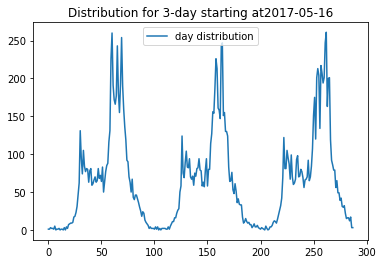

In [66]:
data = traffic_flow_name.values[90]
plt.plot(data[2:], label='day distribution')
# plt.plot(score2_2013[:96], label='PC2 score')
# plt.xticks(pos, legend)

plt.legend()
plt.title('Distribution for 3-day starting at' + str(data[1]))
plt.show()

In [51]:
# print(traffic_flow_name.tail().to_numpy()[:,2:])
# print()
# print(X.max(axis=0))
# print(X.mean(axis=0))

In [83]:
# remove to each flow the average flow for the time step: centering the data
X = np.array(traffic_flow_name.values[:,2:]).T
b = X.max(axis=0)
for i in range(len(b)):
    if b[i] == 0:
        b[i] = 0.2
X_normed = X / b
X_bar = X_normed - X_normed.mean(axis=0, dtype='float64')

# X_2017 = np.array(traffic_flow_2017).T
# X_2017_normed = X_2017 / X_2017.max(axis=0)
# X_2017_bar = X_2017_normed - X_2017_normed.mean(axis=0, dtype='float64')

In [85]:
pca_ = PCA()
pca_.fit(X_bar)

# pca_2017 = PCA()
# pca_2017.fit(X_2017_bar)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

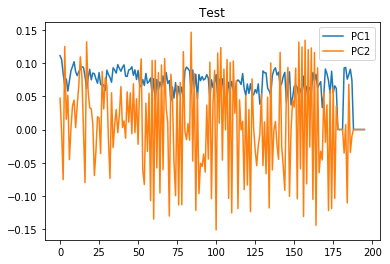

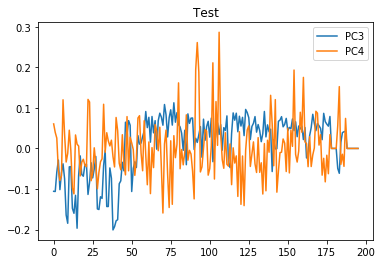

In [92]:
v1 = pca_.components_[0]
v2 = pca_.components_[1]
v3 = pca_.components_[2]
v4 = pca_.components_[3]

plt.plot(v1, label='PC1')
plt.plot(v2, label='PC2')
#plt.plot(v3, label='PC3')
#plt.xticks([index_hw_2013], ['hw'])
plt.legend()
plt.title("Test")
plt.show()

plt.plot(v3, label='PC3')
plt.plot(v4, label='PC4')
plt.legend()
plt.title("Test")
plt.show()


In [87]:
print("Test")
print("Variance along the first principal component: ", np.round(pca_.explained_variance_ratio_[0],2)*100, "%")
print("Variance along the second principal component: ", np.round(pca_.explained_variance_ratio_[1],2)*100, "%")
print("Variance along the second principal component: ", np.round(pca_.explained_variance_ratio_[2],2)*100, "%")
print("Variance along the second principal component: ", np.round(pca_.explained_variance_ratio_[3],2)*100, "%")
print(np.round(pca_.explained_variance_ratio_*100),2)

Test
Variance along the first principal component:  74.0 %
Variance along the second principal component:  11.0 %
Variance along the second principal component:  5.0 %
Variance along the second principal component:  2.0 %
[74. 11.  5.  2.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [89]:
score = np.array([np.dot(X_bar[i,:],v1)  for i in range(864)])
# f(X_bar, v1)
score2 = np.array([np.dot(X_bar[i,:],v2)  for i in range(864)])
# score2 = f(X_bar, v2)

score3 = np.array([np.dot(X_bar[i,:],v3)  for i in range(864)])
score4 = np.array([np.dot(X_bar[i,:],v4)  for i in range(864)])

# score_2017 = f(X_2017_bar, v1_2017)
# score2_2017 = f(X_2017_bar, v2_2017)

plt.scatter(score, score2)
plt.title('Projections along PC1 and PC2')
plt.show()

plt.scatter(score[:288], score2[:288])
plt.scatter(score[289:576], score2[289:576])
plt.scatter(score[577:], score2[577:])
plt.title('Projections along PC1 and PC2')
plt.show()

plt.scatter(score3[:288], score4[:288], color="blue")
plt.scatter(score3[289:576], score4[289:576], color="orange")
plt.scatter(score3[577:], score4[577:], color="green")
plt.title('Projections along PC3 and PC4')
plt.show()

# plt.scatter(score_2017, score2_2017)
# plt.title('2017 Projections along PC1 and PC2')
# plt.show()

IndexError: index 288 is out of bounds for axis 0 with size 288

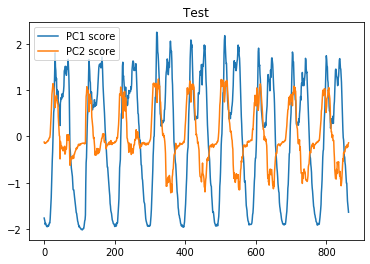

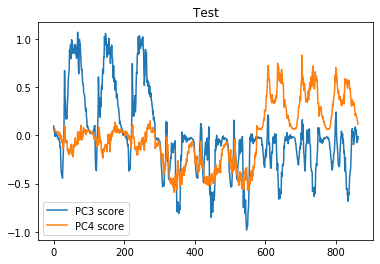

In [86]:
plt.plot(score, label='PC1 score')
plt.plot(score2, label='PC2 score')
# plt.xticks(pos, legend)
plt.legend()
plt.title('Test')
plt.show()

plt.plot(score3, label='PC3 score')
plt.plot(score4, label='PC4 score')
# plt.xticks(pos, legend)
plt.legend()
plt.title('Test')
plt.show()

In [24]:
legend = []
pos = []
for i in range(7):
    pos.append(4*4*i)
    legend.append(str(4*i) + ":00")
print(legend)

['0:00', '4:00', '8:00', '12:00', '16:00', '20:00', '24:00']


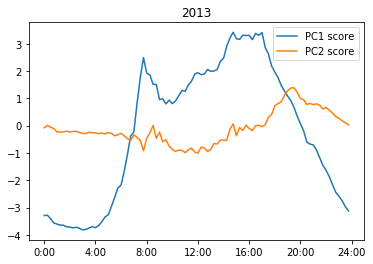

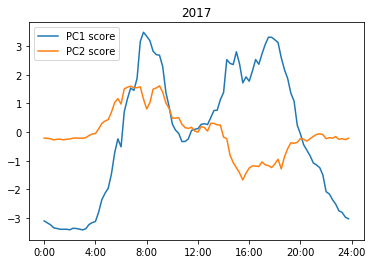

In [10]:
plt.plot(score_[:96], label='PC1 score')
plt.plot(score2_[:96], label='PC2 score')
plt.xticks(pos, legend)
plt.legend()
plt.title('2013')
plt.show()

plt.plot(score_2017[:96], label='PC1 score')
plt.plot(score2_2017[:96], label='PC2 score')
plt.xticks(pos, legend)
plt.legend()
plt.title('2017')
plt.show()

# OLD

In [2]:
traffic_flow = pd.read_csv('Flow_processed.csv')

# Delete 2019 data (need more processing)
index2019 = traffic_flow[traffic_flow['Year'] == 2019].index
traffic_flow.drop(index2019, inplace=True)
traffic_flow.dropna(inplace=True)

traffic_flow_2013 = traffic_flow[traffic_flow['Year'] == 2013]
traffic_flow_2017 = traffic_flow[traffic_flow['Year'] == 2017]

type_road_2013 = []
for l in traffic_flow_2013['Name'].to_numpy():
    if "PeMS" in l:
        type_road_2013.append("HW")
    else:
        type_road_2013.append("L.rd")
# print(type_road)
index_hw_2013 = np.argwhere(np.array(type_road_2013)=='HW')[0][0]

type_road_2017 = []
for l in traffic_flow_2017['Name'].to_numpy():
    if "PeMS" in l:
        type_road_2017.append("HW")
    else:
        type_road_2017.append("L.rd")
# print(type_road)
index_hw_2017 = np.argwhere(np.array(type_road_2017)=='HW')[0][0]

# Remove unnecessary columns for PCA
traffic_flow_2013 = traffic_flow_2013.drop(['Year', 'Name', 'Id', 'Direction', 'Day 1'], axis=1)
traffic_flow_2017 = traffic_flow_2017.drop(['Year', 'Name', 'Id', 'Direction', 'Day 1'], axis=1)
# print(traffic_flow_2013.head())
# print(traffic_flow_2013.describe())

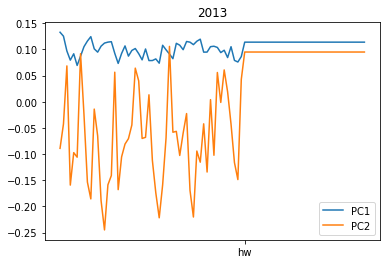

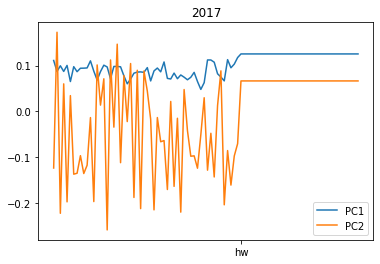

In [6]:
# print(grades_data.columns)
v1_2013 = -pca_2013.components_[0]
v2_2013 = pca_2013.components_[1]
v3_2013 = pca_2013.components_[2]

v1_2017 = pca_2017.components_[0]
v2_2017 = pca_2017.components_[1]
v3_2017 = pca_2017.components_[2]

plt.plot(v1_2013, label='PC1')
plt.plot(v2_2013, label='PC2')
# plt.plot(v3, label='PC3')
plt.xticks([index_hw_2013], ['hw'])
plt.legend()
plt.title("2013")
plt.show()

plt.plot(v1_2017, label='PC1')
plt.plot(v2_2017, label='PC2')
# plt.plot(v3, label='PC3')
plt.xticks([index_hw_2017], ['hw'])
plt.legend()
plt.title("2017")
plt.show()
